In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

![Screenshot 2024-08-08 211751.png](<attachment:Screenshot 2024-08-08 211751.png>)
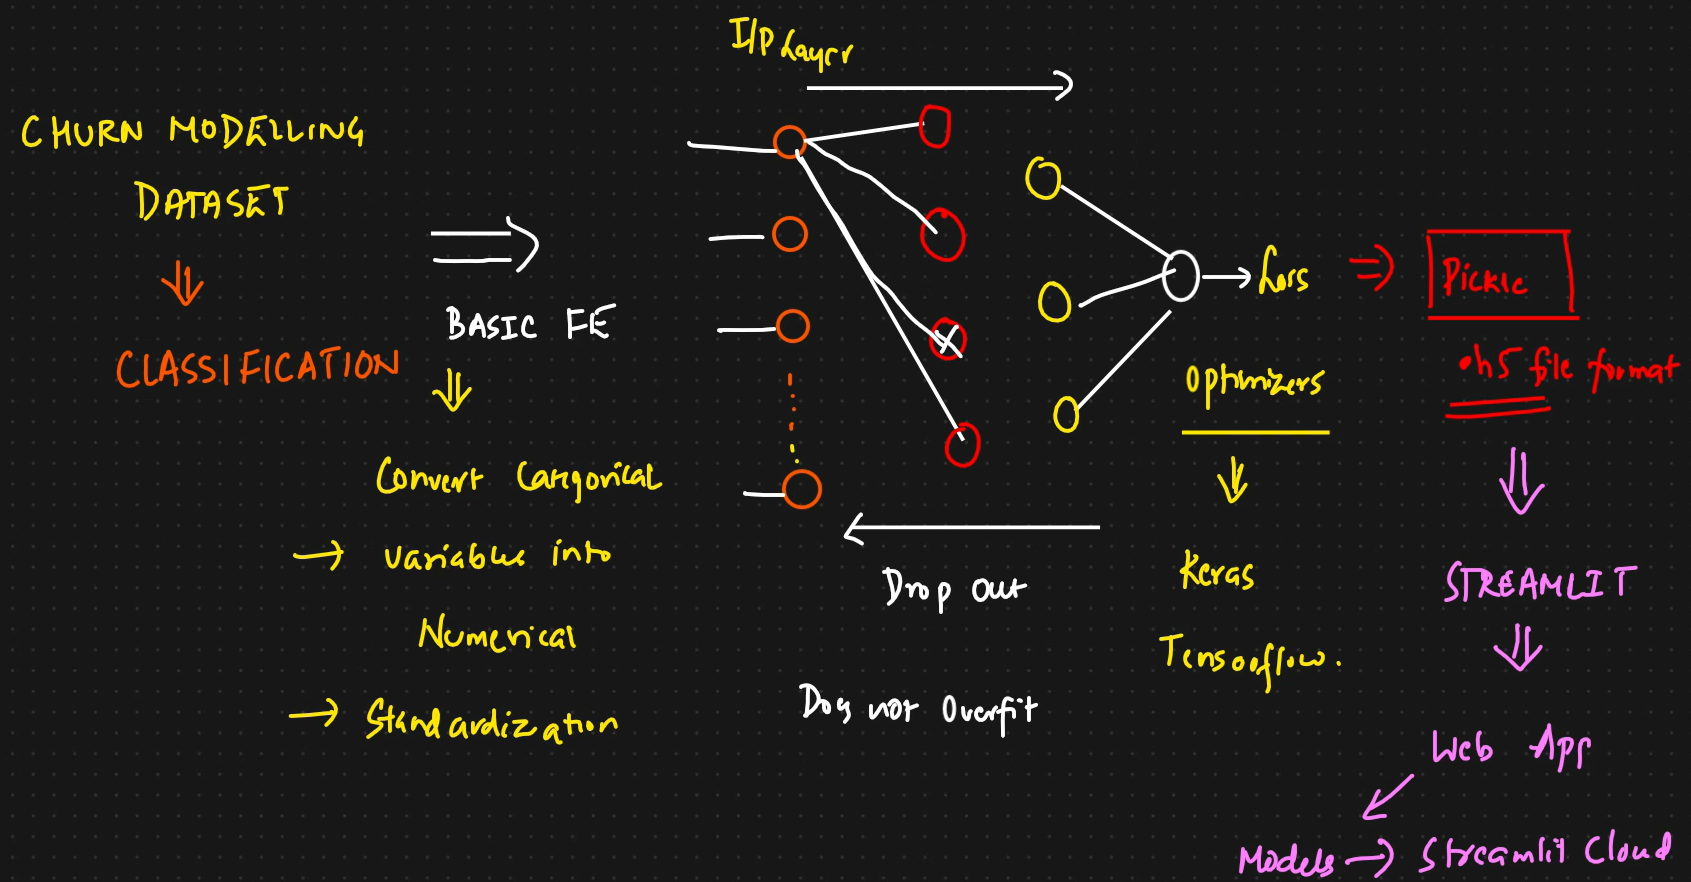

In [2]:
# Load the dataset
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Preprocessing the data 
## Drop irrelevant columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Encode Gender categorical variable using label encoder
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# One hot encoding Geography column
from sklearn.preprocessing import OneHotEncoder
ohe_geo = OneHotEncoder()
geo_encoder = ohe_geo.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [8]:
ohe_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [9]:
geo_encoded_df = pd.DataFrame(geo_encoder.toarray(),columns=ohe_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [10]:
# Combine one hot encoded columns with the original data
data = pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [11]:
# Save the encoders
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('ohe_geo.pkl','wb') as file:
    pickle.dump(ohe_geo,file)

In [13]:
# Divide the dataset into independent and dependent features
X = data.drop('Exited',axis=1)
y = data['Exited']

# Split the data in training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# save the scaler
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

## ANN Implementation

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [35]:
# Build ANN model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), # HL1 connected with input layer
    Dense(32,activation='relu'), # HL2
    Dense(1,activation='sigmoid') # Output layer
]
)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()

In [38]:
# compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
# Setup the Tensorboard
log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [40]:
# Setup Early Stopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [41]:
# Train the model
history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 [==============================] - 3s 7ms/step - loss: 0.3937 - accuracy: 0.8374 - val_loss: 0.3633 - val_accuracy: 0.8555
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3544 - accuracy: 0.8522 - val_loss: 0.3437 - val_accuracy: 0.8550
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3497 - accuracy: 0.8537 - val_loss: 0.3721 - val_accuracy: 0.8560
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3432 - accuracy: 0.8580 - val_loss: 0.3481 - val_accuracy: 0.8580
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.8599 - val_loss: 0.3430 - val_accuracy: 0.8620
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3384 - accuracy: 0.8612 - val_loss: 0.3395 - val_accuracy: 0.8610
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8651 - val_loss: 0.3452 - val_accuracy: 0.8595

In [43]:
# save the model
model.save('Model.h5')

In [26]:
# Load Tensorboard extension
%load_ext tensorboard

In [33]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 1664), started 0:11:14 ago. (Use '!kill 1664' to kill it.)